In [2]:
from IPython.display import HTML
import requests

HTML(requests.get("https://vincentarelbundock.github.io/Rdatasets/doc/ggplot2/diamonds.html").content.decode("utf-8"))

diamonds,R Documentation


In [3]:
import pandas as pd
import seaborn as sns; sns.set_style("white")
import matplotlib.pyplot as plt; plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
from pandas.plotting import register_matplotlib_converters; register_matplotlib_converters()

#df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/diamonds.csv", index_col=0)
df = pd.read_csv("diamonds.csv", index_col=0)
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
import pandas_profiling
df.profile_report()

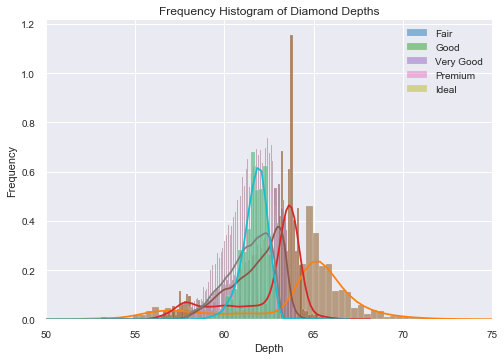

In [62]:
cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

x = list(map(lambda cut: df.loc[df.cut==cut, 'depth'], cuts))

kwargs = dict(alpha=0.5, bins=100, density=True)
kwargs2 = dict(bins=100)

for i in range(len(cuts)):
    plt.hist(x[i], **kwargs, label=cuts[i])
    sns.distplot(x[i], **kwargs2)
plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency', xlabel="Depth")
plt.xlim(50,75)
plt.legend();

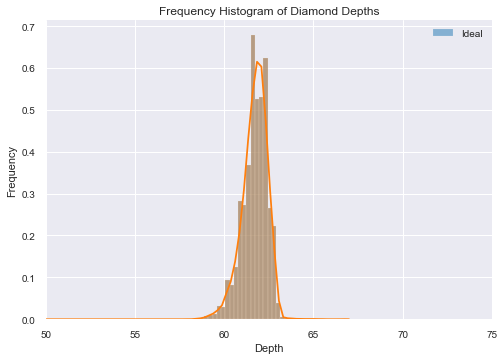

In [66]:
cuts = ["Ideal"]

x = list(map(lambda cut: df.loc[df.cut==cut, 'depth'], cuts))

kwargs = dict(alpha=0.5, bins=100, density=True)
kwargs2 = dict(bins=100)

for i in range(len(cuts)):
    plt.hist(x[i], **kwargs, label=cuts[i])
    sns.distplot(x[i], **kwargs2)
plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency', xlabel="Depth")
plt.xlim(50,75)
plt.legend();

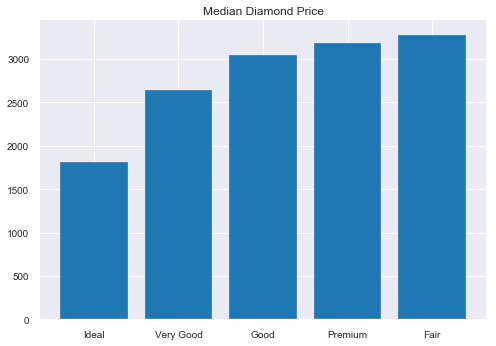

In [7]:
data = df[['cut', 'price']].groupby('cut').median().round(2).sort_values('price')

plt.bar(data.index, height=data.price)
plt.title('Median Diamond Price');

Statistics:
  count: 21551.0
  mean: 61.70940095587212
  std: 0.7185385840815617
  min: 43.0
  25%: 61.3
  50%: 61.8
  75%: 62.2
  max: 66.7


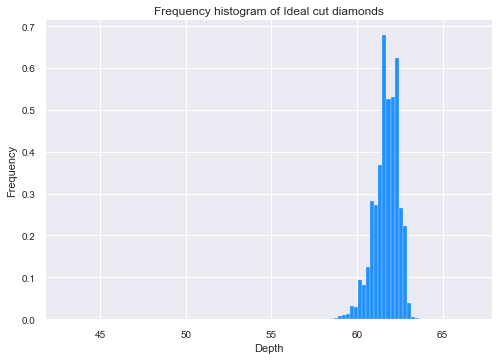

In [121]:
X = df[df["cut"] == "Ideal"]["depth"]
X_mean = X.describe()['mean']
X_std = X.describe()['std']
plt.hist(X, color="dodgerblue", bins=100, density=True)
plt.gca().set(title='Frequency histogram of Ideal cut diamonds', ylabel='Frequency', xlabel="Depth")
print("Statistics:")
for k, v in dict(X.describe()).items():
    print(f"  {k}: {v}")
plt.show()
tmp = df[df["cut"] == "Ideal"]

Statistics:
  count: 21348.0
  mean: 61.727946411841856
  std: 0.6638306682934403
  min: 59.6
  25%: 61.3
  50%: 61.8
  75%: 62.2
  max: 63.8


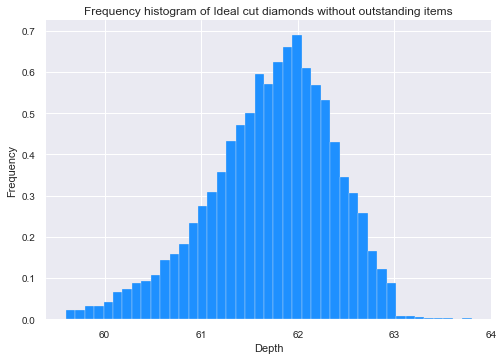

In [125]:
X = df[df["cut"] == "Ideal"]
X = X[abs(X['depth'] - X_mean) <= 3 * X_std]["depth"]
plt.hist(X, color="dodgerblue", bins=43, density=True)
plt.gca().set(title='Frequency histogram of Ideal cut diamonds without outstanding items', ylabel='Frequency', xlabel="Depth")
print("Statistics:")
for k, v in dict(X.describe()).items():
    print(f"  {k}: {v}")
plt.show()